In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import graphviz
from graphviz import Source

In [2]:
df_raw = pd.read_csv('breast-cancer.csv')
df_raw

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df_mean = df_raw.iloc[:,1:12]
df_mean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [4]:
df_mean.groupby('diagnosis').nunique()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,284,311,338,341,326,345,336,337,298,326
M,196,199,191,205,190,204,206,208,188,205


Check for null values

In [5]:
df_mean.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

Check for zero values

In [6]:
df_mean.loc[(df_mean['diagnosis'].isnull()) |
                     (df_mean['radius_mean'] == 0) |
                     (df_mean['texture_mean'] == 0) |
                     (df_mean['perimeter_mean'] == 0) |
                     (df_mean['area_mean'] == 0) |
                     (df_mean['smoothness_mean'] == 0) |
                     (df_mean['compactness_mean'] == 0) |
                     (df_mean['concavity_mean'] == 0) |
                     (df_mean['concave points_mean'] == 0) |
                     (df_mean['symmetry_mean'] == 0) |
                     (df_mean['fractal_dimension_mean'] == 0)]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,0.07818
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,0.06422
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,0.05975
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,0.06724
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,0.06447
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,0.07359
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,0.07098
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,0.05960
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,0.07285
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,0.05948


Check if the rows with zeros are outliers

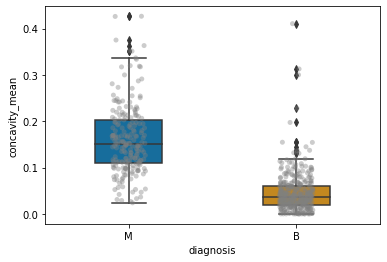

In [7]:
sb.boxplot(y='concavity_mean', x='diagnosis', data= df_mean, width=0.4, palette='colorblind')
sb.stripplot(y='concavity_mean', x='diagnosis', data= df_mean, jitter=True, alpha=0.4, color='grey')
plt.show()

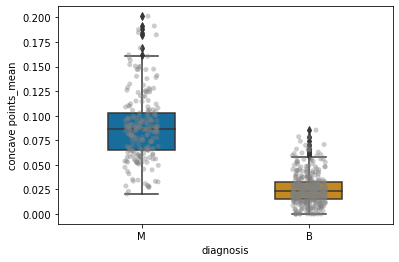

In [8]:
sb.boxplot(y='concave points_mean', x='diagnosis', data= df_mean, width=0.4, palette='colorblind')
sb.stripplot(y='concave points_mean', x='diagnosis', data= df_mean, jitter=True, alpha=0.4, color='grey')
plt.show()

In [9]:
df_mean.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


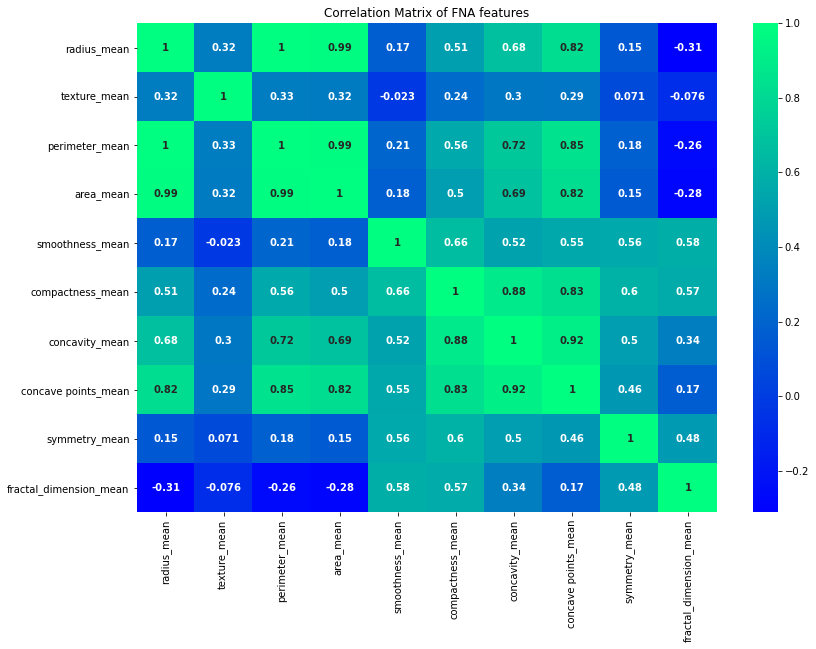

In [10]:
plt.figure(figsize=(13,9))
ax = sb.heatmap(data=df_mean.corr(), annot=True, cmap='winter', annot_kws={'weight': 'bold'})
plt.title('Correlation Matrix of FNA features')
plt.show()


High correlation: [Radius, perimeter, area], [compactness, concavity, concave point]

# Data Pre-processing for Model Training

In [11]:
df_mean['diagnosis'] = df_mean['diagnosis'].map(
                        {'B' : 0,
                         'M' : 1})
df_mean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


Abbreviated table - removed features with high correlation

In [14]:
data = df_mean[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']]
data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883
...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016


In [15]:
target = df_mean['diagnosis']
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Decision Tree Model & Evaluation

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
score = accuracy_score(y_test, dt.predict(X_test))
print(score)


0.9300699300699301


In [18]:
%timeit -n1000 dt.fit(X_train, y_train)

2.57 ms ± 54.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
dt.predict([[20.0, 30.0, 0.1, 0.05, 0.05, 0.1, 0.05]])

array([1], dtype=int64)

In [20]:
%timeit -n1000 dt.predict([[20.0, 30.0, 0.1, 0.05, 0.05, 0.1, 0.05]])

68.5 µs ± 3.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
data.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.062798
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.007060
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.057700
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.061540
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.066120
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,0.097440


In [22]:
X_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
287,12.890,13.12,0.06955,0.03729,0.02260,0.1337,0.05581
512,13.400,20.52,0.11060,0.14690,0.14450,0.2116,0.07325
402,12.960,18.29,0.07351,0.07899,0.04057,0.1874,0.05899
446,17.750,28.03,0.09997,0.13140,0.16980,0.1713,0.05916
210,20.580,22.14,0.09090,0.13480,0.16400,0.1765,0.05024
...,...,...,...,...,...,...,...
71,8.888,14.64,0.09783,0.15310,0.08606,0.1902,0.08980
106,11.640,18.33,0.11420,0.10170,0.07070,0.1801,0.06520
270,14.290,16.82,0.06429,0.02675,0.00725,0.1508,0.05376
435,13.980,19.62,0.10600,0.11330,0.11260,0.1669,0.06544


In [23]:
y_train

287    0
512    1
402    0
446    1
210    1
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 426, dtype: int64

With all columns

In [24]:
data2 = df_mean[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
data2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [25]:
X_train2, X_test2, y_train, y_test = train_test_split(data2, target, random_state = 42)

dt2 = DecisionTreeClassifier()
dt2.fit(X_train2, y_train)
score2 = accuracy_score(y_test, dt2.predict(X_test2))
print(score2)

0.916083916083916


In [27]:
%timeit -n1000 dt2.fit(X_train2, y_train)

3.19 ms ± 78.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
data2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [29]:
dt2.predict([[20.0, 30.0, 150.0, 900, 0.1, 0.05, 0.05, 0.03, 0.1, 0.05]])

array([0], dtype=int64)

In [30]:
%timeit -n1000 dt2.predict([[20.0, 30.0, 150.0, 900, 0.1, 0.05, 0.05, 0.03, 0.1, 0.05]])

71.5 µs ± 4.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Decision Tree Diagram

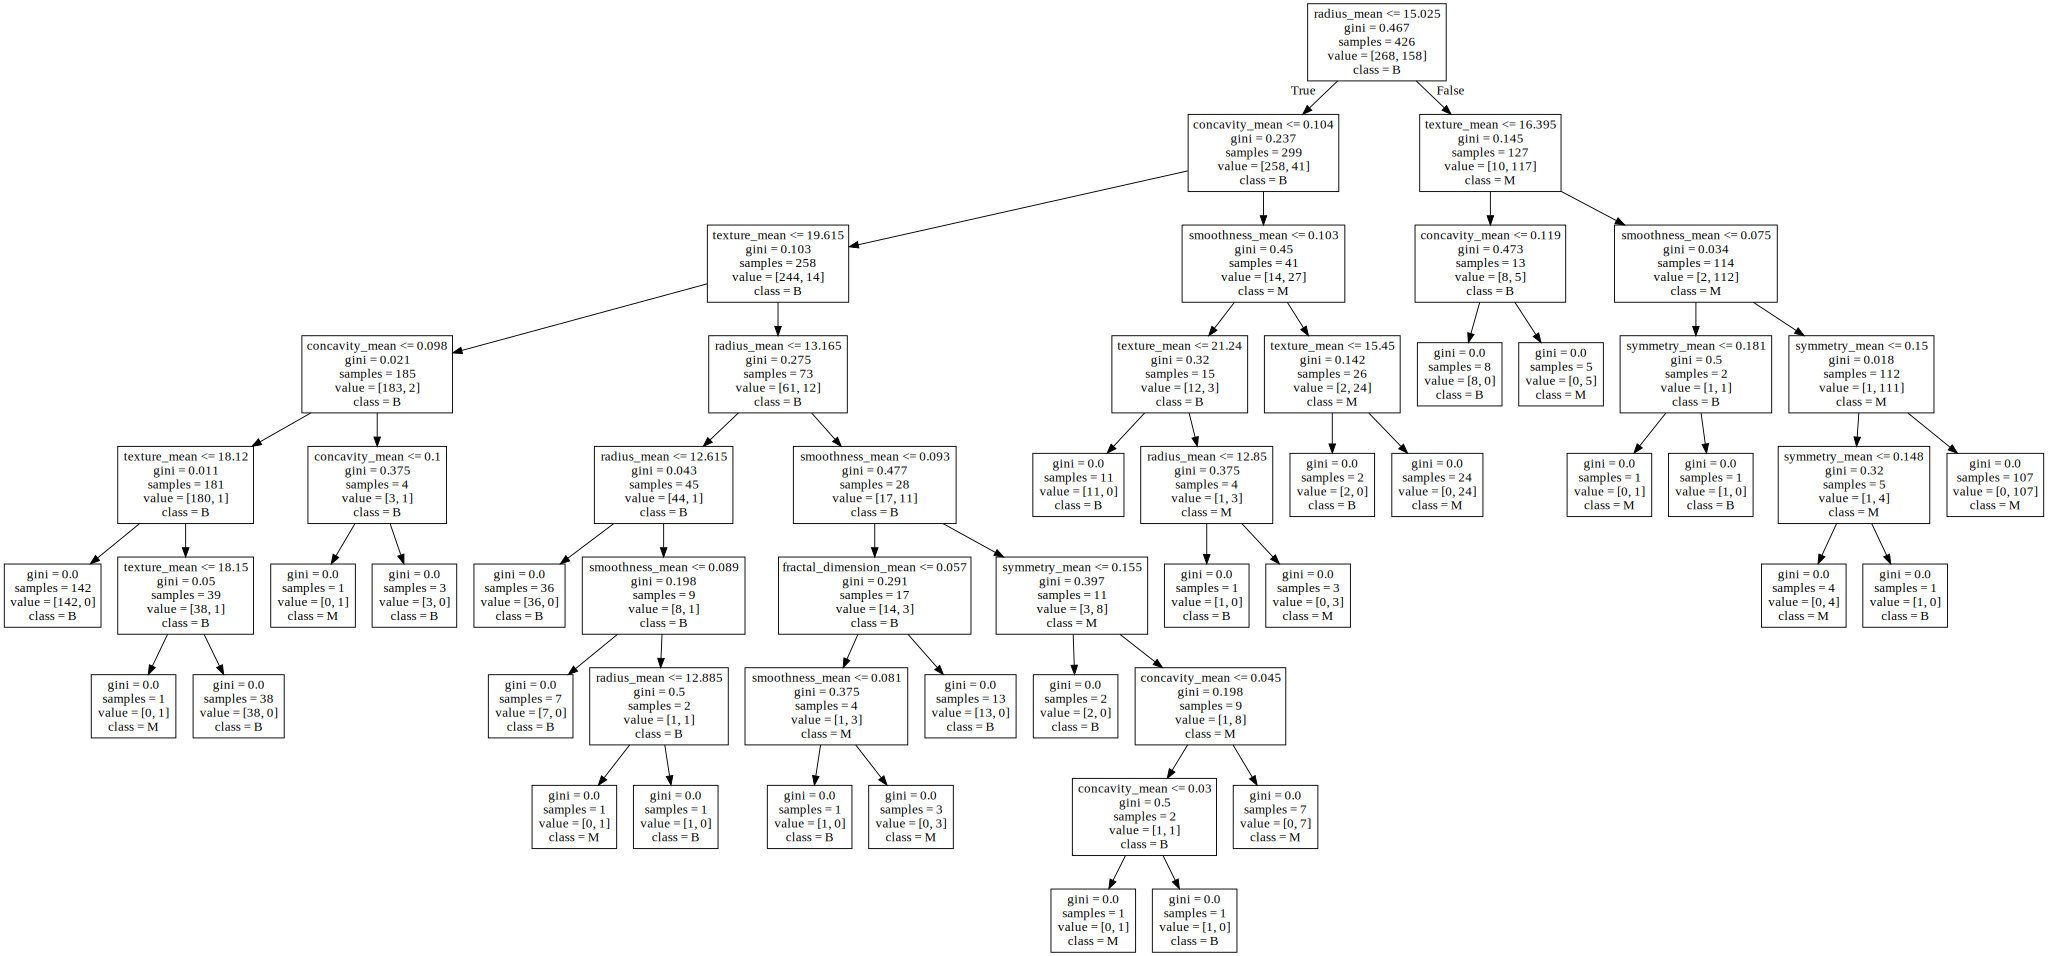

In [31]:
Source(tree.export_graphviz(dt, out_file=None, class_names=['B', 'M'], feature_names= X_train.columns))

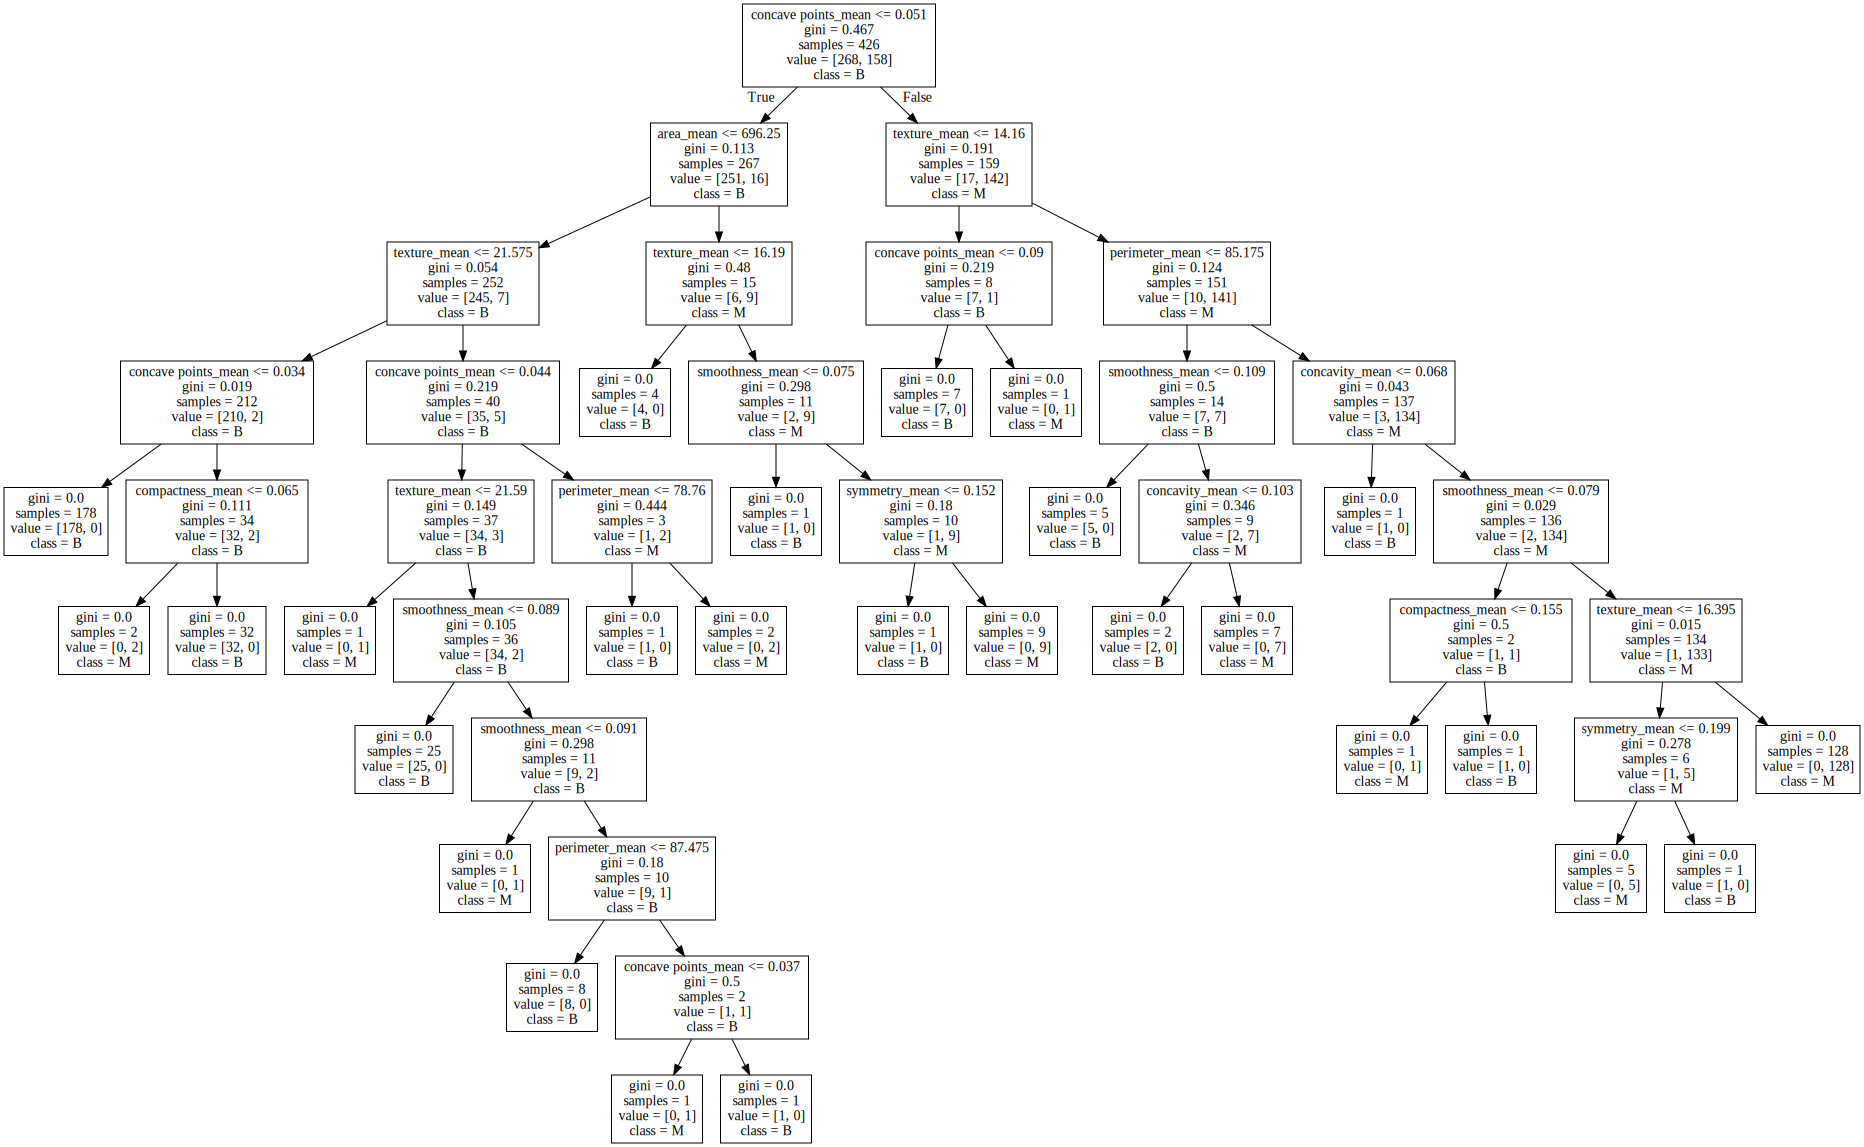

In [32]:
Source(tree.export_graphviz(dt2, out_file=None, class_names=['B', 'M'], feature_names= X_train2.columns))